
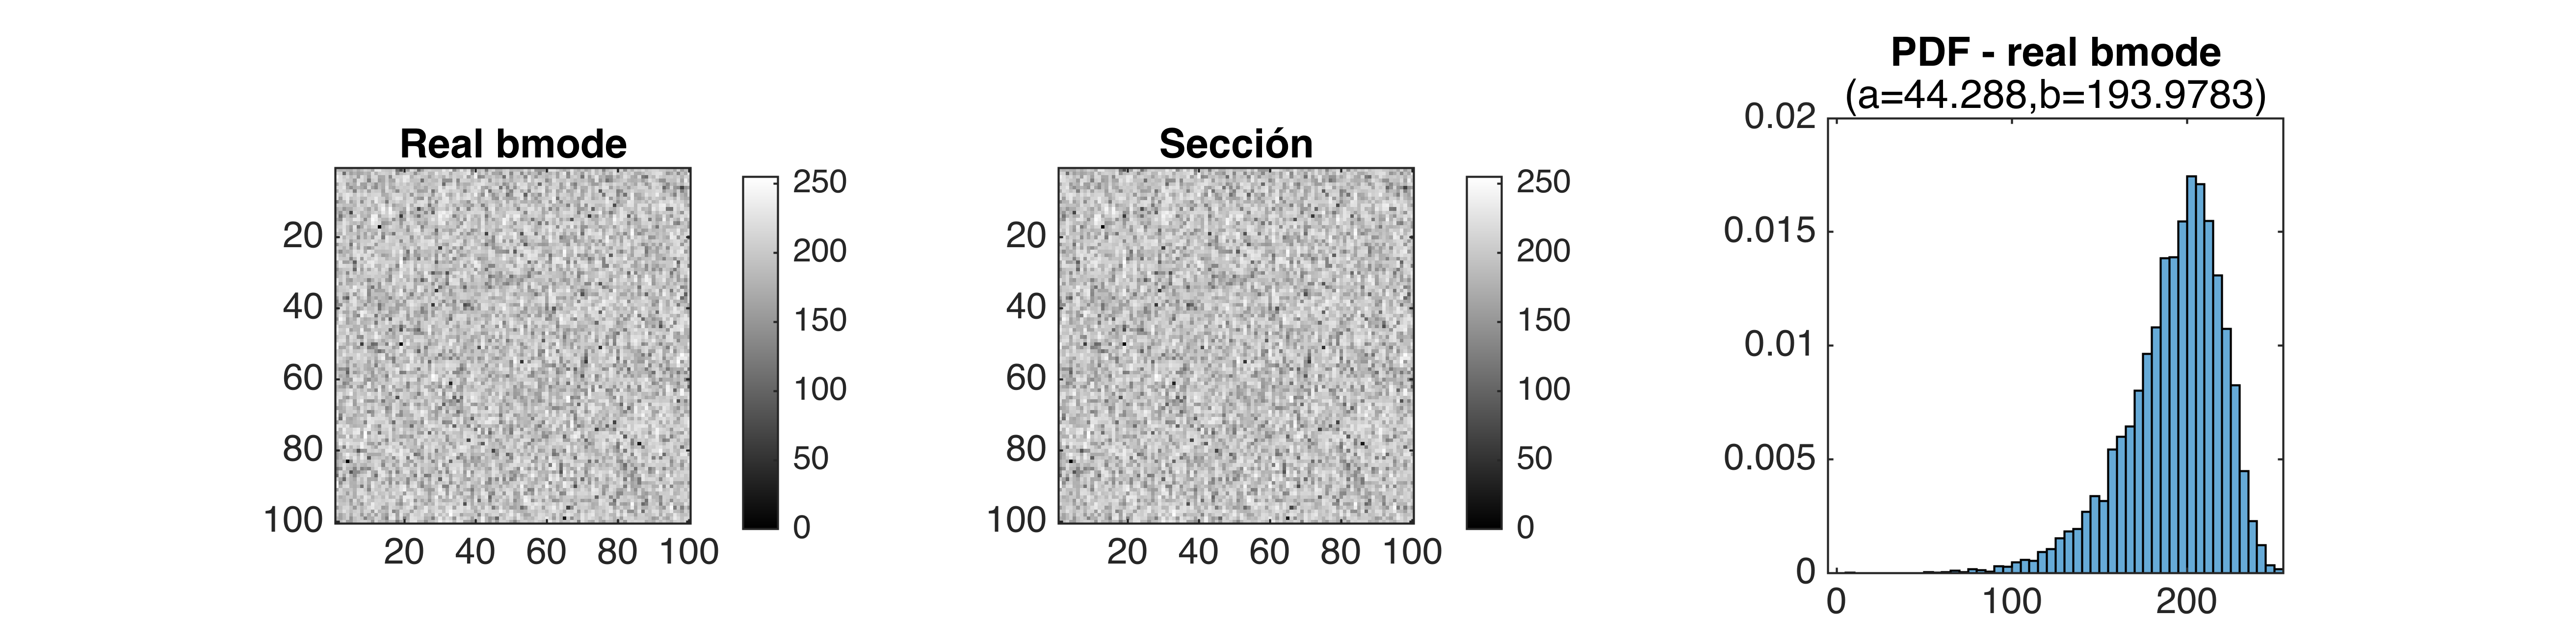

In [1]:
clear; close all; clc;

xl=100;yl=100;

load('hkdist_1e5.mat');rf=reshape(data(1:yl*xl),yl,xl);
rf=rf-mean(rf(:));

env_rf=abs(hilbert(rf));
[a_0,b_0]=getab(env_rf);
z=a_0*log(env_rf)+b_0;
% z=round(z);

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);imagesc(z);colormap gray;colorbar;axis image;
title('\bfReal bmode');
subplot(1,3,2);imagesc(z);
colormap gray;colorbar;title('Sección');axis image;
subplot(1,3,3);histogram(z,Normalization='pdf');
title('PDF - real bmode',['(a=',num2str(a_0),',b=',num2str(b_0),')']);axis square;


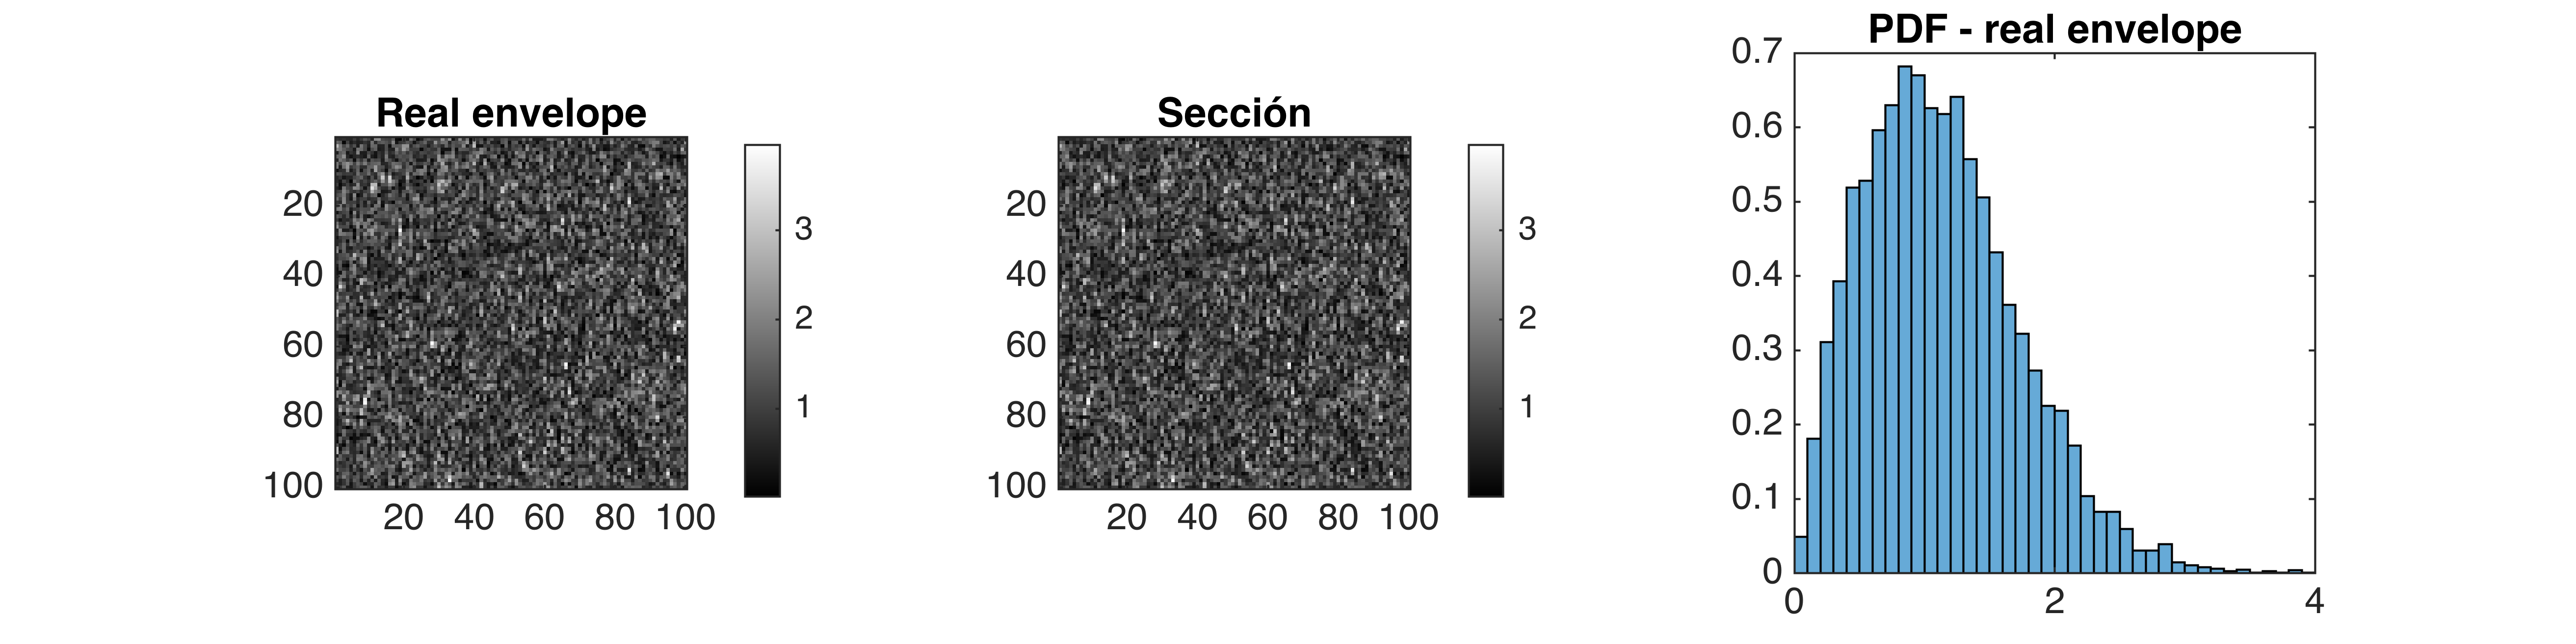

In [2]:

f=figure;f.Position=f.Position.*[1 1 1.5 0.5];
subplot(1,3,1);imagesc(env_rf);
colormap gray;colorbar;title('\bfReal envelope');axis image;
subplot(1,3,2);imagesc(env_rf);
colormap gray;colorbar;title('Sección');axis image;
subplot(1,3,3);histogram(env_rf,Normalization='pdf');
title('PDF - real envelope');axis square;

In [3]:
%%%%%%%%% IMPLEMENTACIÓN 1 %%%%%%%%%
sigma=std(z(:));
mu=mean(z(:));
gamma=double(eulergamma);
psi=7000;

alpha=sqrt(24/pi^2*sigma^2);
% beta=mu-alpha/2*(log(2*psi)-gamma);
beta=b_0;

y1=exp((z-beta)/alpha);
D_seabra1=alpha;

In [4]:
%%%%%%%%% IMPLEMENTACIÓN 2 %%%%%%%%%

% n=41; m=n; L=n*m;

n=14;
% d=zeros(100,1);
% for n=1:100
m=n; L=n*m;
% a
ni=(n-1)/2;mj=(m-1)/2;
a_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);

for i=ni+1:size(z,1)-ni
for j=mj+1:size(z,2)-mj
    window = z(i-ni:i+ni, j-mj:j+mj);
    sigma = std(window,0,'all');

    % a
    a_w(i-ni,j-mj) = sigma;
end
end
a=sqrt(24)/pi*mean(a_w,'all');
% d(n)=a;
% end

% % b
% % s_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);
% b_w=zeros(size(z,1)-2*ni,size(z,2)-2*mj);
% for i=ni+1:size(z,1)-ni
% for j=mj+1:size(z,2)-mj
%     window = z(i-ni:i+ni, j-mj:j+mj);
%     sigma = std(window,0,'all');
%
%     % s
%     % s_w(i-ni,j-mj) = min(window,[],'all');
%     s = min(window,[],'all');
%
%     % b
%     b_k=zeros(1,L);
%     for k=1:L
%         b_i_j_k= k*s/(L-1);
%         t=exp((s-b_i_j_k)/a)-1;
%         p=L/(a*sigma^2) * t*(t+1) * exp(-L/(2*sigma^2)*t^2);
%
%         b_k(k) = b_i_j_k * p;
%     end
%     b_w(i-ni,j-mj)=sum(b_k);
% end
% end
% b=mean(b_w,'all');
b=b_0;

y2=exp((z-b_0)/a);
D_seabra2=a;


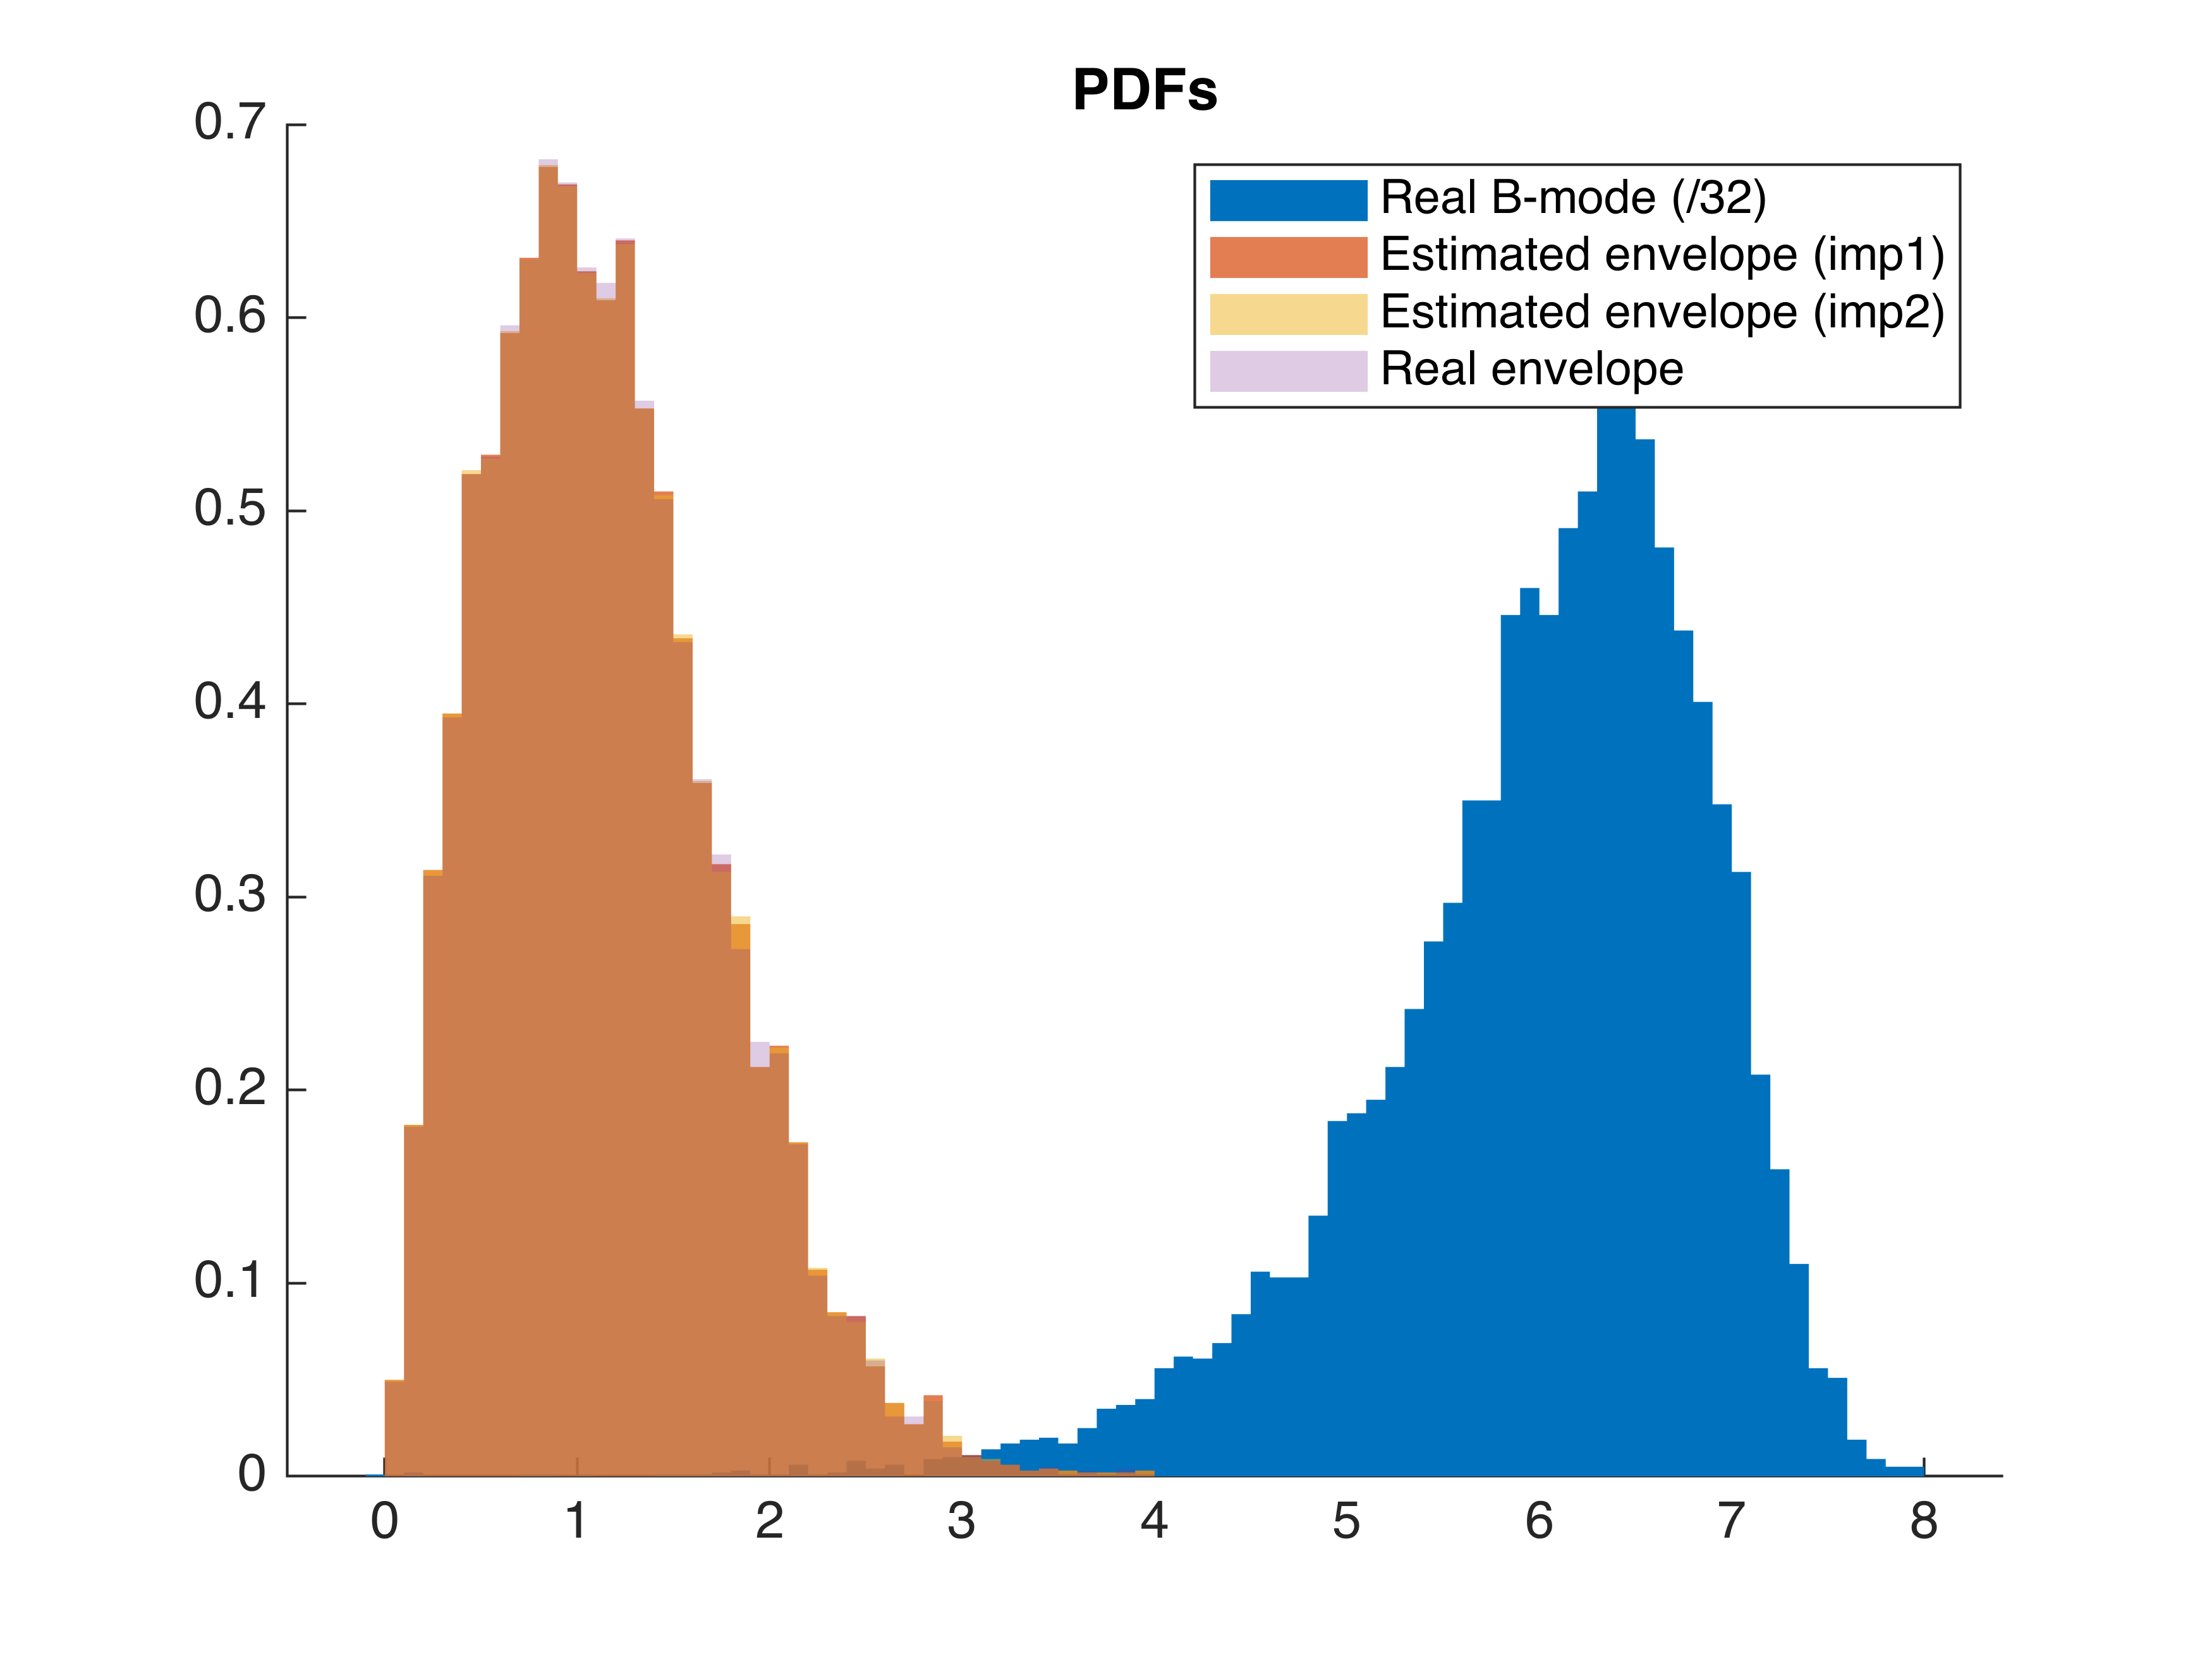

In [5]:
figure;hold on;
histogram(z/32,Normalization='pdf',FaceAlpha=1,EdgeAlpha=0);
histogram(y1,Normalization='pdf',FaceAlpha=0.75,EdgeAlpha=0);
histogram(y2,Normalization='pdf',FaceAlpha=0.5,EdgeAlpha=0);
histogram(env_rf,Normalization='pdf',FaceAlpha=0.25,EdgeAlpha=0);

title('PDFs');
legend('Real B-mode (/32)','Estimated envelope (imp1)','Estimated envelope (imp2)','Real envelope');

In [6]:
Dlabel={['True value:',num2str(a_0)];'seabra2008modeling';'seabra2011rf'};
Dvalues=[a_0;D_seabra1;D_seabra2];
disp('Valores de D');

Valores de D

In [7]:
table(Dlabel,Dvalues)